# Six Southern Labor Markets #7
### Class of worker, industry, and occupation

March 27, 2019

Brian Dew, @bd_econ

-----

For the combined years 2016, 2017, and 2018, look at what industries and occupations employ people who reside in each area.

Areas:

- Chattanooga
- Knoxville
- Greenville
- Asheville
- Kingsport
- Huntsville
- US total

In [1]:
import pandas as pd
import numpy as np
import os

os.chdir('/home/brian/Documents/econ_data/bd_CPS/')

from bd_CPS_details import ValueLabels

os.chdir('/home/brian/Documents/CPS/data/clean')

In [2]:
areas = [('Chattanooga-Cleveland-Dalton, TN-GA', 'CSA', [174]),
         ('Greenville-Anderson-Spartanburg, SC', 'CSA', [273]),
         ('Asheville, NC', 'CBSA', [11700]),
         ('Johnson City-Kingsport-Bristol, TN-VA', 'CSA', [304]),
         ('Huntsville, AL', 'CBSA', [26620]),
         ('Knoxville, TN', 'CBSA', [28940])]

In [3]:
# CPS data
columns = ['MONTH', 'YEAR', 'CBSA', 'CSA', 'AGE', 'INDD', 'INDGRP',
           'BASICWGT', 'LFS', 'WORKFT']
df = (pd.read_feather('cps2018.ft', columns=columns)
        .query('MONTH > 4')
        .append(pd.read_feather('cps2019.ft', columns=columns))
        .query('(CSA in [174, 273, 304]) or (CBSA in [11700, 26620, 29490])')
        .query('LFS == "Employed"'))

df['INDD'] = df['INDD'].map(ValueLabels['INDD'])

data = df.groupby('INDD').BASICWGT.sum() / 12

In [74]:
df.groupby(['INDD', 'WORKFT']).BASICWGT.sum() / 12

INDD                                               WORKFT
Accommodation                                      0.0          469.273102
                                                   1.0         2759.687500
Administrative and support services                0.0        27328.531250
                                                   1.0        48572.437500
Agriculture                                        0.0         3361.076904
                                                   1.0         5403.865723
Arts, entertainment, and recreation                0.0        11501.708008
                                                   1.0        15652.117188
Beverage and tobacco products                      0.0          245.484009
                                                   1.0         2087.121338
Broadcasting (except internet)                     0.0          950.479797
                                                   1.0         2465.554932
Chemical manufacturing                    

In [4]:
# CPS data
df = (pd.read_feather('cps2015.ft', columns=columns)
        .query('MONTH > 4')
        .append(pd.read_feather('cps2016.ft', columns=columns).query('MONTH <= 4'))
        .query('(CSA in [174, 273, 304]) or (CBSA in [11700, 26620, 29490])')
        .query('LFS == "Employed"'))

df['INDD'] = df['INDD'].map(ValueLabels['INDD'])

data2 = df.groupby('INDD').BASICWGT.sum() / 12

In [5]:
(data - data2) / 1000

INDD
Accommodation                                              10.320043
Administrative and support services                       -20.703199
Agriculture                                                 4.464051
Arts, entertainment, and recreation                        -0.837166
Beverage and tobacco products                               0.854035
Broadcasting (except internet)                              3.020559
Chemical manufacturing                                      8.785143
Computer and electronic product manufacturing              -0.327161
Construction                                               25.415009
Educational services                                        9.218953
Electrical equipment, appliance manufacturing               6.347715
Finance                                                     9.722693
Food manufacturing                                          8.150519
Food services and drinking places                         -21.176710
Forestry, logging, fishing, h

In [36]:
data = df.groupby('INDGRP').BASICWGT.sum().divide(12).sort_values(ascending=True)

data = data[data > 500]

data = data / data.sum() * 100.0

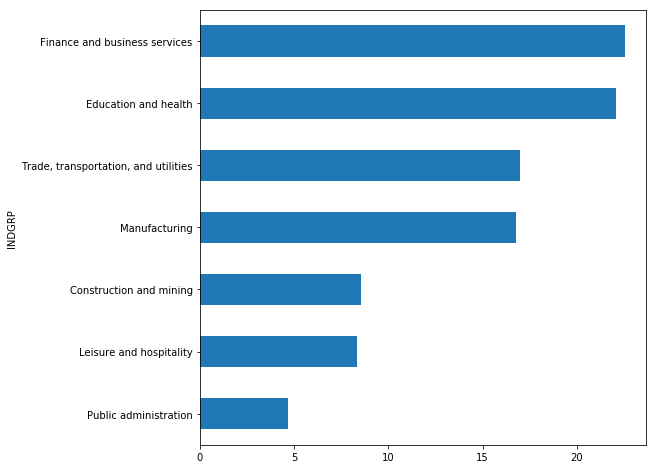

In [37]:
%matplotlib inline

data.plot(kind='barh', figsize=(8, 8))

In [15]:
data[data > 500]

INDGRP
Public administration                    83561.523438
Construction and mining                 152699.296875
Leisure and hospitality                 155131.671875
Manufacturing                           297312.531250
Trade, transportation, and utilities    308456.531250
Education and health                    395925.625000
Finance and business services           407614.093750
Name: BASICWGT, dtype: float32

In [ ]:
areas = [('Chattanooga-Cleveland-Dalton, TN-GA', 'CSA', [174]),
         ('Greenville-Anderson-Spartanburg, SC', 'CSA', [273]),
         ('Asheville, NC', 'CBSA', [11700]),
         ('Johnson City-Kingsport-Bristol, TN-VA', 'CSA', [304]),
         ('Huntsville, AL', 'CBSA', [26620]),
         ('Knoxville, TN', 'CBSA', [28940])]

area_names = [area[0] for area in areas]

In [ ]:
# CPS data
os.chdir('/home/brian/Documents/CPS/data/clean')
columns = ['MONTH', 'YEAR', 'CBSA', 'CSA', 'AGE', 'INDGRP', 'BASICWGT']
pd.read_feather('cps2018.ft', columns=columns)

In [ ]:
csa = [area[2][0] for area in areas if area[1] == 'CSA']
cbsa = [area[2][0] for area in areas if area[1] == 'CBSA']
grps = [('US Total', 'AGE > -1')]
grps2 = [(area[0], f'{area[1]} == {area[2][0]}') for area in areas]
groups = grps2 + grps

# Class of worker, main job

In [ ]:
# CPS data
os.chdir('/home/brian/Documents/CPS/data/clean')

# Subset of columns of interest
columns = ['MONTH', 'YEAR', 'CBSA', 'CSA', 'AGE', 'STATE', 'REGION',
           'BASICWGT', 'LFS', 'COW1', 'IND', 'INDD', 'OCC', 'OCCD']

df = pd.concat([pd.read_feather(f'cps{year}.ft', columns=columns)
                  .query('BASICWGT > 0 and LFS == "Employed"')
                for year in [2016, 2017, 2018, 2019]])

In [ ]:
df['OCCD'] = df['OCCD'].map(OccsDT2010)
df['OCC'] = df['OCC'].map(Occs2010)
df['INDD'] = df['INDD'].map(IndsDT2012)
df['IND'] = df['IND'].map(Inds2012)

In [ ]:
d = df.query('CBSA == 28940')

In [ ]:
d.groupby('COW1').BASICWGT.sum().divide(38).round(-2).sort_values(ascending=False)

# Unemployment type

In [ ]:
# CPS data
os.chdir('/home/brian/Documents/CPS/data/clean')

# Subset of columns of interest
columns = ['MONTH', 'YEAR', 'CBSA', 'CSA', 'AGE', 'STATE', 'REGION',
           'BASICWGT', 'LFS', 'UNEMPTYPE', 'UNEMPDUR']

df = pd.concat([pd.read_feather(f'cps{year}.ft', columns=columns)
                for year in [2016, 2017, 2018]])

In [ ]:
# Collect results for total, men, women in each area
results = pd.DataFrame()
for group in groups:
    data = df.query(group[1])
    data = data.query('AGE >= 16')
    u = data.groupby('UNEMPTYPE').BASICWGT.sum()
    lf = data[data['LFS'] != 'NILF'].BASICWGT.sum()
    s = ((u / lf) * 100)
    for idx, val in s.iteritems():
        results.at[group[0], idx] = val 
        
results = results.drop('nan', axis=1)
results['Total'] = results.sum(axis=1)

In [ ]:
areas = results[results.index != 'US Total']
total = results[results.index == 'US Total']

areas = areas.sort_values(by='Total')

results = pd.concat([total, areas]).drop('Total', axis=1)
label_locs = results.cumsum(axis=1) - results.divide(2)

In [ ]:
results

#### Graph results

In [ ]:
os.chdir('/home/brian/Documents/blog_posts/Southern_Six/')

In [ ]:
# Stacked horizontal bar chart
fig = plt.figure(figsize=(9,8))

ax = plt.gca()

# Stacked horizontal bar plot
colors = ['#e41a1c', '#377eb8', '#4daf4a', '#984ea3']
results.plot(kind='barh', stacked=True, width=0.5, legend=None, 
             color=colors, ax=ax)

plt.yticks([])

for y_loc, name in enumerate(results.index):
    plt.text(0, y_loc + 0.34, name, fontsize=12, color='gray', weight='bold')
    
for category in label_locs:
    for y_loc, x_loc in enumerate(label_locs[category]):
        text_val = round(results[category].iloc[y_loc], 1)
        plt.text(x_loc, y_loc - 0.07, text_val, weight='bold',
                 fontsize=10, color='white', ha='center')

plt.ylim(-0.5, 8)
plt.xlim(0, 5.1)
        
# Custom legend at top of plot
plt.text(0.3, 7.2, 'Job leaver', ha='center')
rect = Rectangle((0.1, 6.8), 0.4, 0.3, facecolor='#e41a1c', edgecolor='none')
ax.add_patch(rect)

plt.text(1.3, 7.2, 'Job loser', ha='center')
rect = Rectangle((1.1, 6.8), 0.4, 0.3, facecolor='#377eb8', edgecolor='none')
ax.add_patch(rect)

plt.text(2.2, 7.2, 'New entrant', ha='center')
rect = Rectangle((2.0, 6.8), 0.4, 0.3, facecolor='#4daf4a', edgecolor='none')
ax.add_patch(rect)

plt.text(3.1, 7.2, 'Re-entrant', ha='center')
rect = Rectangle((2.9, 6.8), 0.4, 0.3, facecolor='#984ea3', edgecolor='none')
ax.add_patch(rect)

# add title and footer
plt.text(-0.1, 8.1, 'Reason for unemployment', 
          fontsize=15, weight='bold')

plt.text(0, 7.7, "Percent of age 16+ labor force", fontsize=12)

plt.text(-0.1, -0.6, "Source: Author's calculations from basic CPS microdata files covering January 2016 to December 2018.")

plt.axis('off')

plt.savefig('unempreason.png', bbox_inches='tight');

### Unemployment duration

In [ ]:
# Collect results for total, men, women in each area
results = pd.DataFrame()
for group in groups:
    data = df.query(group[1])
    data = data.query('AGE >= 16')
    lf = data.loc[data['LFS'] != 'NILF', 'BASICWGT'].sum()
    st = data.loc[data['UNEMPDUR'].between(0, 4), 'BASICWGT'].sum() 
    results.at[group[0], 'Short-term'] = st / lf * 100
    mt = data.loc[data['UNEMPDUR'].between(5, 26), 'BASICWGT'].sum()
    results.at[group[0], 'Medium-term'] = mt / lf * 100
    lt = data.loc[data['UNEMPDUR'] > 26, 'BASICWGT'].sum()
    results.at[group[0], 'Long-term'] = lt / lf * 100
        
results['Total'] = results.sum(axis=1)

In [ ]:
areas = results[results.index != 'US Total']
total = results[results.index == 'US Total']

areas = areas.sort_values(by='Total')

results = pd.concat([total, areas]).drop('Total', axis=1)
label_locs = results.cumsum(axis=1) - results.divide(2)

In [ ]:
results

In [ ]:
# Stacked horizontal bar chart
fig = plt.figure(figsize=(9,8))

ax = plt.gca()

# Stacked horizontal bar plot
colors = ['#e41a1c', '#377eb8', '#4daf4a']
results.plot(kind='barh', stacked=True, width=0.5, legend=None, 
             color=colors, ax=ax)

plt.yticks([])

for y_loc, name in enumerate(results.index):
    plt.text(0, y_loc + 0.34, name, fontsize=12, color='gray', weight='bold')
    
for category in label_locs:
    for y_loc, x_loc in enumerate(label_locs[category]):
        text_val = round(results[category].iloc[y_loc], 1)
        plt.text(x_loc, y_loc - 0.07, text_val, weight='bold',
                 fontsize=10, color='white', ha='center')

plt.ylim(-0.5, 8)
plt.xlim(0, 5.1)
        
# Custom legend at top of plot
plt.text(0.3, 7.2, '0-4 weeks', ha='center')
rect = Rectangle((0.1, 6.8), 0.4, 0.3, facecolor='#e41a1c', edgecolor='none')
ax.add_patch(rect)

plt.text(1.3, 7.2, '5-26 weeks', ha='center')
rect = Rectangle((1.1, 6.8), 0.4, 0.3, facecolor='#377eb8', edgecolor='none')
ax.add_patch(rect)

plt.text(2.2, 7.2, '27+ weeks', ha='center')
rect = Rectangle((2.0, 6.8), 0.4, 0.3, facecolor='#4daf4a', edgecolor='none')
ax.add_patch(rect)


# add title and footer
plt.text(-0.1, 8.1, 'Duration of unemployment', 
          fontsize=15, weight='bold')

plt.text(0, 7.7, "Percent of age 16+ labor force", fontsize=12)

plt.text(-0.1, -0.6, "Source: Author's calculations from basic CPS microdata files covering January 2016 to December 2018.")

plt.axis('off')

plt.savefig('unempduration.png', bbox_inches='tight');